IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME03: Programmation du kernel perceptron

Le but de ce TP est de terminer l'extension de l'algoritheme du perceptron à l'aide de noyaux, avant de commencer à étudier les données du projet.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**


#Sahli oussama
#Nathan Brami

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-04</tt> et rajouter à la suite de <tt>tme-04</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-04-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Mise à jour de votre librairie IADS

Comme lors de la séance précédente, vous devez utiliser les fonctions de la librairie IADS.

<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Rajouter dans la librairie les fonctions et classes et que vous avez écrites lors de la séance précédente. 

**Rappel**: dans un premier temps, vous devez écrire les classes et fonctions demandées dans le notebook de la séance de TDTME en cours. La séance suivante, vous rajouterez tout cela, une fois que vous l'aurez bien testé, dans vos fichiers de la librairie IADS.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  



In [61]:
class LabeledSet:  
    """ Classe pour représenter un ensemble d'exemples (base d'apprentissage)
        Variables d'instance :
            - input_dimension (int) : dimension de la description d'un exemple (x)
            - nb_examples (int) : nombre d'exemples dans l'ensemble
    """
    

    def __init__(self, input_dimension):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        """ Ajout d'un exemple dans l'ensemble
            Argument: 
                - vector ()
                - label (int) : classe de l'exemple (+1 ou -1)
            
        """
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))  
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1   
    
    def getInputDimension(self):
        """ Renvoie la dimension de l'espace d'entrée
        """
        return self.input_dimension
    
    def size(self):
        """ Renvoie le nombre d'exemples dans l'ensemble
        """
        return self.nb_examples
    
    def getX(self, i):
        """ Renvoie la description du i-eme exemple (x_i)
        """
        return self.x[i]             
    
    #
    def getY(self, i):
        """ Renvoie la classe de du i-eme exemple (y_i)
        """
        return(self.y[i])

In [62]:
# Exemple d'utilisation de LabeledSet

une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +#1
#print(une_base.getX(0))
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +#1
#print(une_base.getX(1))
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1#
#print(une_base.getX(2))
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1
#print(une_base.getX(3))

S_pos = une_base.x[np.where(une_base.y == 1),:][0]
print(S_pos)
#print(une_base.x) # affiche tous les points sans leur classe
#print(une_base.x[np.where(une_base.y==1)])
#print(np.where(une_base.y==1))
print(une_base)

[[0 1]
 [2 3]]


In [63]:
def affiche_base(objetLabelSet):
    #lse exemples de l'objet labeldset sont stocké dans sa variable x
    nb_exemples=objetLabelSet.size()
    for i in range(0,nb_exemples):
        ex_i=objetLabelSet.getX(i)
        print(ex_i,objetLabelSet.getY(i))
     

affiche_base(une_base)

[0 1] [1]
[2 3] [1]
[1 2] [-1]
[2 2] [-1]


In [64]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    #print(S_pos)
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o') # 'o' pour la classe +1
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x') # 'x' pour la classe -1
    
# Par exemple :len(data)
#plot2DSet(une_base)

In [65]:
def createGaussianDataset(positive_center,positive_sigma,negative_center,negative_sigma,nb_points):
    #on doit générer 10 point négatif et 10 point positifs
    #on doit les générer autour de leur centre respectifs
    #retourne un ensemble de point associé à une moyenne et une covariance
    #+ la covariance est grande + lespace de valeurs est grand
    #points_pos=np.random.multivariate_normal(positive_center, positive_sigma) #jobtient un ensemble d'exemple positif de dim 2
    #points_neg=np.random.multivariate_normal(negative_center,negative_sigma)
    #est ce uq les points généré sont de dim 2?
    
    une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
    
    #j'ajoute les points positifs à ma base 
    for i in range(0,nb_points):
        points_pos=np.random.multivariate_normal(positive_center, positive_sigma) #jobtient un ensemble d'exemple positif de dim 2
        points_neg=np.random.multivariate_normal(negative_center,negative_sigma)
        une_base.addExample(points_pos,1)   # ajout de l'exemple de classe +1
        une_base.addExample(points_neg,-1)   # ajout de l'exemple de classe +1
   
    #je retourne mon objet LabeledSet qui m'a servit à stocker mes couples d'exemples 
    return une_base

In [66]:
# Exemple d'utilisation:


#the_set = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)
the_set = createGaussianDataset(np.array([1,1]),np.array([[0.01,0],[0,0.001]]),np.array([4,4]),np.array([[0.1,0],[0,0.01]]),10)
# remarque: 
"la variance est une mesure de la dispersion des valeurs d'un échantillion autour de la moyenne."
"Elle représente la moynne des carrés des écart à la moyenne."
"Si la variance est faible , alors les valeurs sont très centré autour de la moyenne"
"Si la variance est grande, les valeurs seront très espacés"
"L'écart type renseigne sur la dispersion des valeurs de la série par rapport à la moyenn."
"+ l'écart type est petit , + les valeurs sont regroupé autour de la moyenne , et inversement"

#Explication des veleur insérer dans la matrice 2*2
#"on a  une matrice 2*2 --> |variance_x ecart_type_x   |"
#                          "|ecart_type_y variance_y   |"


"Remarque importante --> dans la matrice 2*2 de covarince , on a 4 parametres : (variance de x(abcisse),ecart type associé au x,"
"variance de y(ordonne),ecart type associé à y)"
"Si on augmente la variance de x ,alors les point seront tres disperesé autour de la moyenne sur laxe des x"
"Si on augmente lecart type de x alors les points seront tres dispereser autour de la moyenne sur laxe des x "
"Si on augmente la variance de y alors les points seront tres dispereser autour de la moyenne sur laxe des y "
"Si on augmente lecart type de y alors les points seront tres dispereser autour de la moyenne sur laxe des y"
    
"chaque point est repréenté par deux cordonnées(x ,y), ainsi si on s'amuse à modifier les valeurs associé à variance_x"
"et à variance_y , on obtiendra le comportement décrit ci dessus"

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
#plot2DSet(the_set)

Taille de la base jouet générée : 20 exemples


In [67]:
class Classifier:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        raise NotImplementedError("Please Implement this method")

    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        
        raise NotImplementedError("Please Implement this method")
    
    def accuracy(self, dataset):
        """ Permet de calculer la qualité du système the_set
        """
        #TODO !!!!
        #on a un ensemble d'exemple dans le dataset , chacun de ces exemples sont associié à des classes --> 
        #ce sont les résultats attendues
        #predict renvoie un score positif si cest positif , et négatif sinon
        # pedict va faire une prédiction sur la classe de chacun des exemples contenue dans le dataset
        #on fera une moyenne sur l'ensemble de ses prédiction qui ont étét juste
        #dataset = ensemble dexemple de dim 2
        #print(dataset.size())
        total=dataset.size() #nombre d'exemple evalués
        classe_ok=0 # si la prediction est correct sur la classe attendu , alors on incrémente de 1
        for i in range (0,dataset.size()):
            exemple_courant=dataset.getX(i)
            classe_de_exemple_courant=dataset.getY(i)
            score=self.predict(exemple_courant)
            #print("score et classe")
           # print(score,classe_de_exemple_courant)
            if(score*classe_de_exemple_courant>=0):
                classe_ok=classe_ok+1
        
        return (classe_ok*100)/total # pourcentage de classe correct predit 

In [68]:
class ClassifierRandom(Classifier):
    """ Classe pour représenter un classifieur linéaire aléatoire
        Cette classe hérite de la classe Classifier
    """
    
    #TODO: définir le constructeur, et les méthodes predict et train
    
    def __init__(self, input_dimension):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v # comme ca w est compris entre -1 et 1 # w est notre vecteur directeur , c'est à partirde lui quon se base pour savoir si un point appartient à une classe ou à une autre
       
        
    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        print("Pas d'apprentissage pour ce classifieur")
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        #on calcule le produit scalaire de w avec x(lexemple contenu dans le dataset)
        
        produit_scalaire=np.dot(self.w,x)
        return produit_scalaire

        

In [69]:
un_classifieur = ClassifierRandom(2)

#génération de 100 point aléatoire de dimensions 2 car le classifieur est de dim 2

mon_dataset= LabeledSet(2)  # définition d'une base pour contenir des exemples en 2D
for i in range(0,50):
    mon_dataset.addExample(np.random.randint(1,3,2),1)   # ajout de l'exemple # je met que des point positif de classe 1

for i in range(0,50):
    mon_dataset.addExample(np.random.randint(4,6,2),-1)   # ajout de l'exemple # je met que des point positif de classe -1
#affiche_base(mon_dataset)
pourcentage_ok=un_classifieur.accuracy(mon_dataset)
#pourc=un_classifieur.accuracy(the_set)
print(pourcentage_ok)

#resulatat : 50 , quand la classe cest -1 il se trompe 

# + step est grand et + plus la ligne tracé est droite

def plot_frontiere(set,classifier,step=10):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0) #l'exemple contenu dans le dataset quii contient les valeurs max
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])

42.0


In [70]:
classifieur_random=ClassifierRandom(2)

#plot_frontiere(the_set,classifieur_random)
#plot2DSet(the_set)

In [71]:
import math
class ClassifierKNN(Classifier):
    #TODO
    def __init__(self, input_dimension,nb_voisins):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_voisins=nb_voisins
    
    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        self.dataset=labeledSet  #base de point , on mémorise le LabeledSet constitué d'exemples
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
       #x est un exemple contenue dans le dataset
       # on doit prédire la classe associé à cet exemple (1 ou -1)
       # on a mémorisé le dataset dans une variable , en appelant la methode train
        # on calcule les k distances les plus petites qui le séparent de k voisins parmis lensemble des voisins
        #on récupere les classes associé à ces k voisins
        #on fait la moyenne entre ces k vakeur --> et on obtient la valeur de la classe prédit pour notre exemple courant
        
        # je cherhce donc k exemples
        #je calules tous les distances , je trie le tableau de distance obtenue , et je ne garde que les trois +petites
        #jassocie ces distance aux k voisins , et la je peux recup leur classe 
        #je fais un dictionnaire ou la distance et la classe associé à l'exemple seront stocké, ca m'évitera daller cherhcer les valeurs de ces classes
         
        #récuperer les cordonnées de x car x peut avoir plusieurs dimensiosn
        #ATTENTION:
        # pas besopin de faire un dico , car argsort renvoir les indice des plus petite valeurs
        #jai juste à calcuuler la liste des distances 
        coords_x=x #liste des coordonnées
        distances=[]
        #coords_p=[]
        for i in range(0,self.dataset.size()):       
            s=0 
            
            #je constitue la liste de coordonées du point courant
            #faire attention a ne pas faire une comparaison avec soi meme
            coords_p=self.dataset.getX(i)
            #print(coords_p,coords_x)
            #calcule la somme des coordonnées
            for j in range(0,len(coords_p)):
                #print(coords_x[i],coords_p[i])
                #print(s)
                s=s+((coords_x[j]-coords_p[j])**2)
                #print(s)
            s=math.sqrt(s)
            distances.append(s)
            
        # la j'ai toute mes distances
        index = np.argsort(distances) #indices des elements minum --> ordre croissant
        k_voisins=[] # je recup mes k voisins
        for i in range(0,self.nb_voisins):
            k_voisins.append(index[i])
            
        classes=[] # je recup les cllasses associés à ces distance 
        for i in range(0,len(k_voisins)):
            classes.append(self.dataset.getY(k_voisins[i]))
        
        somme_classes=0
        for i in range(0,len(classes)):
            somme_classes=somme_classes+classes[i]
           
        return somme_classes/len(somme_classes) # somme des classes associés au k + proche voisins/nbvoisins

In [72]:
# Exemple d'utilisation :
knn = ClassifierKNN(2,1)
knn.train(the_set)

#plot_frontiere(the_set,knn,20)
#plot2DSet(the_set) 

In [73]:
# Exemple d'utilisation de LabeledSet

une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D

une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +1
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +1
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1

# Fonction pour afficher le LabeledSet
def affiche_base(LS):
    """ LabeledSet
        affiche le contenu de LS
    """
    for i in range(0,LS.size()):
        print("Exemple "+str(i))
        print("\tdescription : ",LS.getX(i))
        print("\tlabel : ",LS.getY(i))
    return

# Affichage de la base
affiche_base(une_base)

Exemple 0
	description :  [0 1]
	label :  [1]
Exemple 1
	description :  [2 3]
	label :  [1]
Exemple 2
	description :  [1 2]
	label :  [-1]
Exemple 3
	description :  [2 2]
	label :  [-1]


Taille de la base jouet générée : 20 exemples


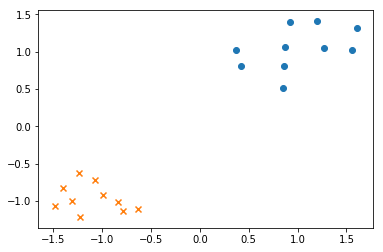

In [74]:
# Exemple d'utilisation de utils
#rappel : une gaussienne est représentée par la fonction exp(-x^2), elle a la forme d'une courbe en clauche
#elle sert à représenter les notions de moyenne,variance et ecart types

#avec une variance + petite autour de chaque axe(x et y), on obtient des points centrer autour de la moeynne associé
#à chacune des deux gaussienne
the_set = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([-1,-1]),np.array([[0.1,0],[0,0.1]]),10)

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
plot2DSet(the_set)


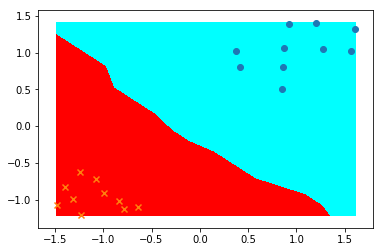

In [75]:
# Exemple d'utilisation de Classifiers pour créer un knn:

knn = ClassifierKNN(2,3)

knn.train(the_set)

plot_frontiere(the_set,knn)
plot2DSet(the_set)

In [76]:
v = np.random.rand(2)     # vecteur aléatoire à input_dimension dimensions
w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de facon à obtenir un w toujours entre -1 et 1
print(v)
print(np.linalg.norm(v))
print(w)

[0.20017239 0.79438041]
0.8192125643719099
[-0.73198978  0.71869116]


In [77]:
class ClassifierPerceptronRandom(Classifier):
    def __init__(self, input_dimension):
        """ Argument:
                - input_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v

    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.dot(x, self.w)
        return z
        
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """        
        print("No training needed")

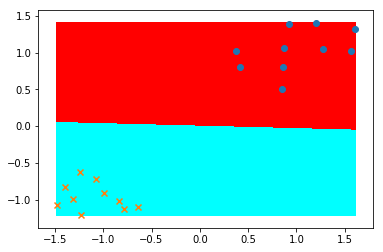

In [78]:
# Exemple de création et d'utilisation d'un Perceptron aléatoire:

perceptron_random = ClassifierPerceptronRandom(2)

plot_frontiere(the_set,perceptron_random)
plot2DSet(the_set)

In [79]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self,input_dimension,learning_rate):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.input_dimension=input_dimension
        self.learning_rate=learning_rate #pas utilisé
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v # comme ca w est compris entre -1 et 1 # w est notre vecteur directeur , c'est à partirde lui quon se base pour s
       

    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        produit_scalaire=np.dot(self.w,x)
        return produit_scalaire
        

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné 
        """
        for i in range(0,labeledSet.size()):
            x=labeledSet.getX(i)
            score=self.predict(x)
            classe_attendue=labeledSet.getY(i)[0]
            if(score>0):
                classe_observe=1
            else:
                classe_observe=-1
            self.w=self.w+(self.learning_rate*(classe_attendue-classe_observe)*x)

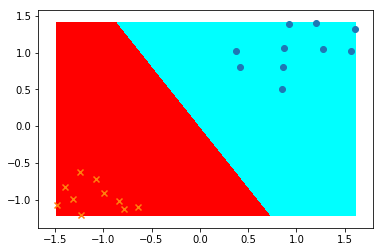

In [80]:
pe=ClassifierPerceptron(2,0.05)
pe.train(the_set)
plot_frontiere(the_set,pe)
plot2DSet(the_set)

accuracy: 55.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 60.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0


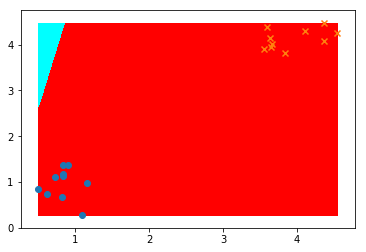

In [81]:
N=20
new_set = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,4]),np.array([[0.1,0],[0,0.1]]),10)
for i in range(0,N):
    pe.train(new_set)
    print("accuracy:",pe.accuracy(new_set))
    

plot_frontiere(new_set,pe)
plot2DSet(new_set)


In [82]:
perce=ClassifierPerceptron(2,0.01)
train1 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,4]),np.array([[0.1,0],[0,0.1]]),100)
train2 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,4]),np.array([[0.1,0],[0,0.1]]),100)
test1 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([1,4]),np.array([[0.1,0],[0,0.1]]),100)
test2 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,1]),np.array([[0.1,0],[0,0.1]]),100)

#on calcule laccuracy sur chacun de ces ensemble de points

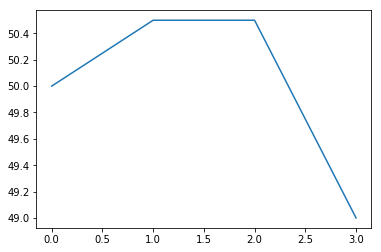

In [83]:
perfs=[]
k=[]

perce.train(train1)                  #--> 1 er ensemble entrainé
pourcentage=perce.accuracy(train1)
perfs.append(pourcentage)
k.append(0)

perce.train(train2)
pourcentage=perce.accuracy(train2)
perfs.append(pourcentage)
k.append(1)

pourcentage=perce.accuracy(test1)    # --> 1 er ensemble de test
perfs.append(pourcentage)
k.append(2)


pourcentage=perce.accuracy(test2)
perfs.append(pourcentage)
k.append(3)

plt.plot(k,perfs)
plt.show()



#On remarque que lorsque on a un ensemble faible de point , l'accuracy a tendance à stagner
#Tandis que lorsque on élargie le domaine de point du Dataset , on obtient une accuracy qui dimunue lorsque on teste l'accuracy
#sur des exemples de tests.
#L'accuracy obtenu sur des exemple d'entrainement est plus grande que celleobtenue sur des exemples de test
# Lorsque on augmente la valeur du pas, l'accuracy stagne pour chacun des ensemble, c-à-d quon obtient une accuracy
#identique pour chaque ensemble

In [84]:
def createXOR(nb_points,var):
    #on concatene chacun des ensemble pour fournir une base de données contenant ces 4 ensembles
    ens1 = createGaussianDataset(np.array([0,0]),np.array([[var,0],[0,var]]),np.array([0,1]),np.array([[var,0],[0,var]]),nb_points)
    ens2 = createGaussianDataset(np.array([1,1]),np.array([[var,0],[0,var]]),np.array([1,0]),np.array([[var,0],[0,var]]),nb_points)
    #ens3 = createGaussianDataset(np.array([1,0]),np.array([[var,0],[0,var]]),np.array([0,1]),np.array([[var,0],[0,var]]),nb_points)
    #ens4 = createGaussianDataset(np.array([1,0]),np.array([[var,0],[0,var]]),np.array([0,1]),np.array([[var,0],[0,var]]),nb_points)
    une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
    
    #j'ajoute les points positifs à ma base 
    for i in range(0,ens1.size()):
        #une_base.addExample(ens1.getX(i),ens1.getY(i)[0])   # ajout de l'exemple de chaque dataset generer au dessus
        #une_base.addExample(ens2.getX(i),ens2.getY(i)[0]) 
        #une_base.addExample(ens3.getX(i),ens3.getY(i)[0]) 
        #une_base.addExample(ens4.getX(i),ens4.getY(i)[0]) 
        ens2.addExample(ens1.getX(i),ens1.getY(i)[0])
    
    return ens2  #contient chaque exemple des 4 dataset cré plus haut 




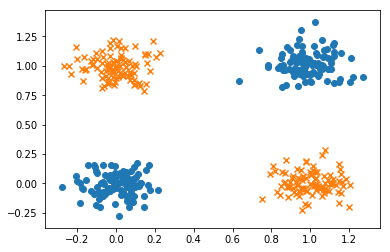

In [85]:
#decente de gradiant stockastique
ens=createXOR(100,0.01)
plot2DSet(ens)

Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [86]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

k=KernelBias()
k.transform(the_set.getX(1))


array([-0.83927672, -1.0158192 ,  1.        ])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe ClassifierPerceptronKernel qui prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR.

In [87]:
class ClassifierPerceptronKernel(Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.dimension_kernel=dimension_kernel
        self.learning_rate=learning_rate
        self.kernel=kernel
        #v = np.random.rand(dimension_kernel)     # vecteur aléatoire à input_dimension dimensions
        #self.w = (2* v - 1) / np.linalg.norm(v) 
        self.w=np.random.randn(self.dimension_kernel)*10*learning_rate
        #print("mon premier w",self.w)
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        #print("w:",self.kernel.transform(self.w))
        #print("exemple:",self.kernel.transform(x))
        produit_scalaire=np.dot(self.w,self.kernel.transform(x))
        # on retourne le signe du pro
        return produit_scalaire

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        self.cout=0 #somme des carré des erreur
        self.labeledSet=labeledSet
        iterate=[i for i in range (0,self.labeledSet.size()-1)]
        np.random.shuffle(iterate) #on modifie lordre detudes des points du dataset
        for i in iterate:
            x=self.labeledSet.getX(i)
            classe_attendue=self.labeledSet.getY(i)[0]
            score=self.predict(x)
            self.w=self.w+(self.learning_rate*(classe_attendue-score)*self.kernel.transform(x))
            self.cout+=((classe_attendue-score)**2)
       

Somme des carré des erreurs 41.02255938289446


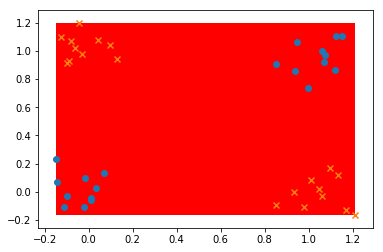

In [88]:
ker=KernelBias()
perceptronk=ClassifierPerceptronKernel(3,0.01,k)
#dtSet = createGaussianDataset(np.array([0,0]),np.array([[0.01,0],[0,0.01]]),np.array([1,1]),np.array([[0.01,0],[0,0.01]]),10)
#affiche_base(dtSet)
#plot_frontiere(dtSet,perceptronk)
#plot2DSet(dtSet)
xor=createXOR(10,0.01)
perceptronk.train(xor)
print("Somme des carré des erreurs",perceptronk.cout)
plot_frontiere(xor,perceptronk)
plot2DSet(xor)

<font color="RED" size="+1">**[Q]**</font> Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. Entrainer le perceptron correspondant sur le XOR. Que constatez-vous ? Donnez une explication (explication donnée en cours lors de la prochaine séance)

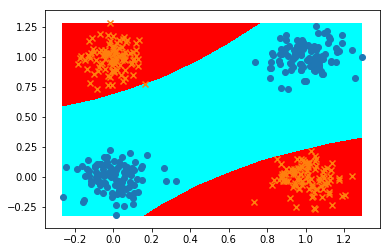

In [89]:
class KernelPoly:
    def transform(self,x):
        y=np.asarray([1,x[0],x[1],x[0]*x[0],x[1]*x[1],x[0]*x[1]])
        return y

N=100
k=KernelPoly()
perceptron_k=ClassifierPerceptronKernel(6,0.1,k)
mon_xor=createXOR(100,0.01)
perceptron_k.train(mon_xor)
plot_frontiere(mon_xor,perceptron_k)
plot2DSet(mon_xor)

##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION



In [90]:
class ClassifierPerceptronKernelBatch(Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.dimension_kernel=dimension_kernel
        self.learning_rate=learning_rate
        self.kernel=kernel
        #v = np.random.rand(dimension_kernel)     # vecteur aléatoire à input_dimension dimensions
        #self.w = (2* v - 1) / np.linalg.norm(v) 
        self.w=np.random.randn(dimension_kernel)*10*learning_rate
        #print("mon premier w",self.w)
        self.gradiant=0

    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        #print("w:",self.kernel.transform(self.w))
        #print("exemple:",self.kernel.transform(x))
        produit_scalaire=np.dot(self.w,self.kernel.transform(x))
        # on retourne le signe du pro
        return produit_scalaire

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        self.cout=0 #somme des carrés des erreur
        self.gradiant=0
        self.labeledSet=labeledSet
        iterate=[i for i in range (0,self.labeledSet.size()-1)]
        np.random.shuffle(iterate) #on modifie lordre detudes des points du dataset
        
        for i in iterate:
            x=self.labeledSet.getX(i)
            classe_attendue=self.labeledSet.getY(i)[0]
            score=self.predict(x)
            self.gradiant+=self.learning_rate*(classe_attendue-score)*self.kernel.transform(x)
            self.cout+=((classe_attendue-score)**2)
        #on change w à la fin de l'itération sur chaque points 
        self.w=self.w+self.gradiant
        
        

Somme des carré des erreurs 910.1429663151512


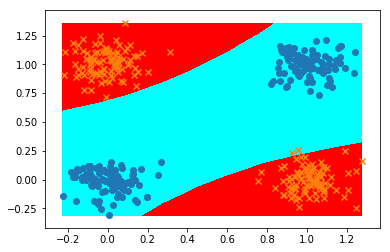

In [91]:

perceptron_kBatch=ClassifierPerceptronKernelBatch(6,0.1,k)
mon_xor=createXOR(100,0.01)
perceptron_kBatch.train(mon_xor)
print("Somme des carré des erreurs",perceptron_kBatch.cout)
plot_frontiere(mon_xor,perceptron_k)
plot2DSet(mon_xor)


In [92]:
#on teste laccuracy entre le mode stocastique et le mode bacth

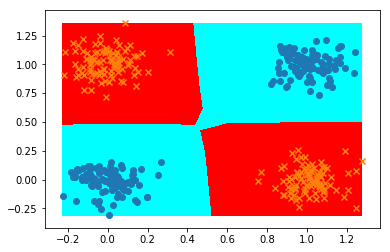

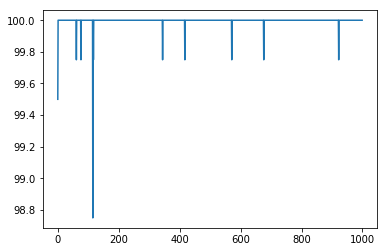

In [93]:
#laccuracy en mode stocastique

x=[]
y=[]
for i in range(1000):
    x.append(i)
    perceptron_k.train(mon_xor)

    y.append(perceptron_k.accuracy(mon_xor))

plot_frontiere(mon_xor,perceptron_k)
plot2DSet(mon_xor)
#plt.plot(x, y)
plt.show()

plt.plot(x, y)
plt.show()

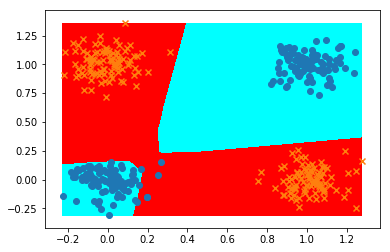

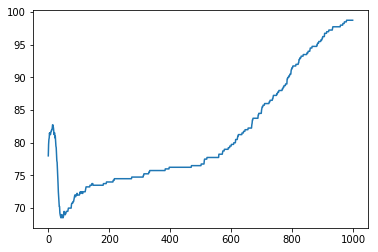

In [94]:
#laccuracy en mode batch
#attention en mode batch il faut utiliser un epsilon + petit pour rester dans le cadran 

perceptron_kBatch2=ClassifierPerceptronKernelBatch(6,0.00001,k)
x=[]
y=[]
for i in range(1000):
    x.append(i)
    perceptron_kBatch2.train(mon_xor)

    y.append(perceptron_kBatch2.accuracy(mon_xor))

plot_frontiere(mon_xor,perceptron_kBatch2)
plot2DSet(mon_xor)
#plt.plot(x, y)
plt.show()

plt.plot(x, y)
plt.show()

Mise en oeuvre sur des données réelles 
-------
A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.

# Préparation du projet

Le projet est à rendre lors de la dernière séance de TD-TME de votre groupe qui aura lieu la semaine du **16 avril**. Lors de cette dernière séance, une soutenance sera organisée afin que vous présentiez le travail réalisé et les résultats obtenus.



## Données

Les données à utiliser sont des données issues d'une base de films et de notations faites par des spectateurs:
- base MovieLens : https://grouplens.org/datasets/movielens/
- base complémentaire `Movie Industrie`: https://www.kaggle.com/danielgrijalvas/movies


<font color="RED">**ATTENTION**: la base est très volumineuse (plus d'1Go) et ne pourra pas tenir sur votre répertoire de travail des machines de TME.</font>

Dans un premier temps, vous travaillerez sur la version réduite de cette base (`ml-latest-small.zip` sur le site movilens) que vous pouvez récupérer sur les machines de TD-TME: `/users/Enseignants/marsala/3i026-2019/MovieLens-small.tgz`
Cette version contient qu'une partie des lignes de la base originale.



En salle de TD-TME, vous accéderez aux données dans les fichiers suivants (à ne pas recopier !):
- répertoire : `/users/Enseignants/marsala/3i026-2019`
- répertoire des données MovieLens version réduite : `/users/Enseignants/marsala/3i026-2019/MovieLens-small/` 
- fichier archive avec les données MovieLesns version réduite : `/users/Enseignants/marsala/3i026-2019/MovieLens-small.tgz`
- répertoire des données MovieLens : `/users/Enseignants/marsala/3i026-2019/MovieLens/` 
  Il contient les fichiers CSV que vous pouvez ouvrir directement dans le notebook.
- fichier `/users/Enseignants/marsala/3i026-2019/kaggle-movies.csv` : infos sur les films de la base Movie Industrie
   
   
  




<font color="RED" size="+1">**[Q]**</font> Réaliser des expérimentations avec la base MovieLens version réduite.

Charger les données dans un dataframe, afficher des informations statistiques sur les données, commencer à réfléchir comment appliquer les classifieurs vus dans les séances précédentes sur ces données...

In [109]:


ratings = pd.read_csv("C:/Users/oussamasahli/3i026/mesCsv/MovieLens-small/ratings.csv")
links= pd.read_csv("C:/Users/oussamasahli/3i026/mesCsv/MovieLens-small/links.csv")
movies= pd.read_csv("C:/Users/oussamasahli/3i026/mesCsv/MovieLens-small/movies.csv")
tags= pd.read_csv("C:/Users/oussamasahli/3i026/mesCsv/MovieLens-small/tags.csv")
= pd.read_csv("C:/Users/oussamasahli/3i026/mesCsv/MovieLens-small/kaggle-movies.csv", encoding='latin-1')




In [121]:
kaggle_movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [112]:
kaggle_movies.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [124]:

kaggle_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [ ]:
"""on a une base de donnée de films réalisés entre 1986 et 2016
L'objectif va être d'analyser ces données
"""

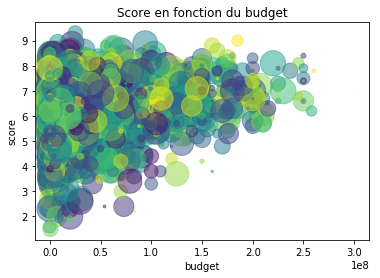

In [128]:
""" ici je visualise le score du films en fonction du budget , sur tous les films entre 1986 et 2016
"""

budget=kaggle_movies["budget"].values
score=kaggle_movies["score"].values
colors=np.random.rand(len(budget))
area= np.pi * (15 * np.random.rand(len(budget)))**2
#En abcisse on veut les budgets , et en ordonnée les prix scores
plt.scatter(budget,score,s=area, c=colors, alpha=0.5)

plt.title('Score en fonction du budget')
plt.xlabel('budget')
plt.ylabel('score')
plt.show()

In [129]:
"""on observe une linéarité des points -- > on peut dire que plus le budgets est élevé et meilleur
sera la note"""

'on observe une linéarité des points -- > on peut dire que plus le budgets est élevé et meilleur\nsera la note'

In [133]:
"""les films ayant obtenue le meilleur score"""
masque=kaggle_movies["score"]==9.3 #dapres describe le score max est 9.3 
meilleurs_films=kaggle_movies[masque]
meilleurs_films.head()
"""le film ayant eu la meilleur note est The Shawshank Redemption """

'le film ayant eu la meilleur note est The Shawshank Redemption '

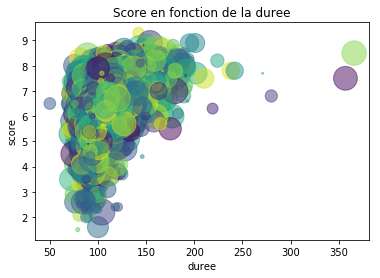

In [134]:
""" ici je visualise le score du films en fonction dela durée , sur tous les films entre 1986 et 2016
"""

duree=kaggle_movies["runtime"].values
score=kaggle_movies["score"].values
colors=np.random.rand(len(budget))
area= np.pi * (15 * np.random.rand(len(duree)))**2
#En abcisse on veut les durees , et en ordonnée les prix scores
plt.scatter(duree,score,s=area, c=colors, alpha=0.5)

plt.title('Score en fonction de la duree')
plt.xlabel('duree')
plt.ylabel('score')
plt.show()

In [135]:
"""la plupart des films durent entre 60 et 130 min.
Pour ces films là, les notes sont comprise entre 4/10 et 9/10 , avec une majorité de notes
audessus de 5/10.
On constate aussi que le public apprécie les films longs --> ceux dune durée >300 min on un score
compris entre 7 et 9."""

'la plupart des films durent entre 60 et 130 min.\nPour ces films là, les notes sont comprise entre 4/10 et 9/10 , avec une majorité de \naudessus de 5/10.\nOn constate aussi que le public apprécie les films longs --> ceux dune durée >300 min on un score\ncompris entre 7 et 9.'

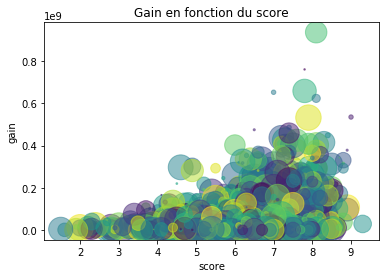

In [136]:
""" ici je visualise le gain dun film en fonction de son score , sur tous les films entre 1986 et 2016
"""

gain=kaggle_movies["gross"].values
score=kaggle_movies["score"].values
colors=np.random.rand(len(gain))
area= np.pi * (15 * np.random.rand(len(gain)))**2
#En abcisse on veut les scores , et en ordonnée les gains obtenues par les films
plt.scatter(score,gain,s=area, c=colors, alpha=0.5)

plt.title('Gain en fonction du score')
plt.xlabel('score')
plt.ylabel('gain')
plt.show()

In [137]:
"""Sur ce  graphique on remarque que les films qui ont bien été notés ont rapporté le plus 
d'argents"""

"Sur ce  graphique on remarque que les films qui ont bien été notés ont rapporté le plus \nd'argents"

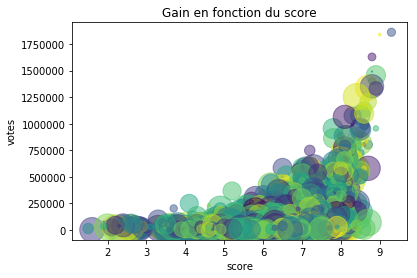

In [138]:
""" ici je visualise le nombre de votes d'un film en fonction de son score ,
sur tous les films entre 1986 et 2016
"""

votes=kaggle_movies["votes"].values
score=kaggle_movies["score"].values
colors=np.random.rand(len(gain))
area= np.pi * (15 * np.random.rand(len(votes)))**2
#En abcisse on veut les scores , et en ordonnée le nombre de votespar films
plt.scatter(score,votes,s=area, c=colors, alpha=0.5)

plt.title('Gain en fonction du score')
plt.xlabel('score')
plt.ylabel('votes')
plt.show()

In [140]:
"""On observe que plus les gens aiment un film et + ils seront nombreux à voter"""

'On observe que plus les gens aiment un film et + ils seront nombreux à voter'

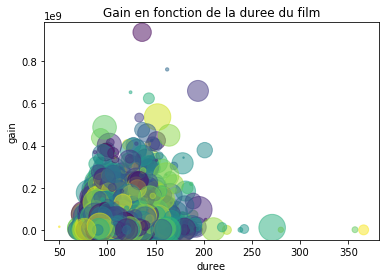

In [142]:
""" ici je visualise les gains  d'un film en fonction de sa duree ,
sur tous les films entre 1986 et 2016
"""

gain=kaggle_movies["gross"].values
duree=kaggle_movies["runtime"].values
colors=np.random.rand(len(gain))
area= np.pi * (15 * np.random.rand(len(gain)))**2
#En abcisse on veut les scores , et en ordonnée le nombre de votespar films
plt.scatter(duree,gain,s=area, c=colors, alpha=0.5)

plt.title('Gain en fonction de la duree du film')
plt.xlabel('duree')
plt.ylabel('gain')
plt.show()

In [143]:
"""Les films qui durent entre 60 et 150 min sont ceux qui rapporte le plus.
Par contre les films qui sont très long rapportent le moins."""

'Les films qui durent entre 60 et 150 min sont ceux qui rapporte le plus.\nPar contre les films qui sont très long rapportent le moins.'

Text(0.5, 1.0, 'nombres de personnes par score')

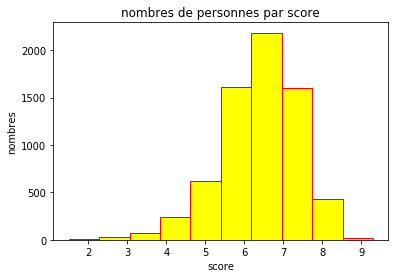

In [162]:
"""Ici on visualise le nombre de fois où une note a été donné"""

scores=kaggle_movies["score"].values
plt.hist(scores,color = 'yellow',edgecolor = 'red')
plt.xlabel('score')
plt.ylabel('nombres')
plt.title('nombres de personnes par score') 

In [163]:
"""On remarque que la plupart des gens mettent une note entre 6 et 8"""

'On remarque que la plupart des gens mettent une note entre 6 et 8'

Text(0.5, 1.0, 'nombre de films par duree')

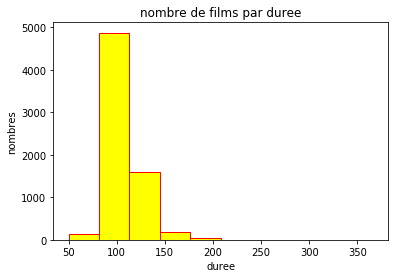

In [164]:
"""ici on visualise la durée des films"""

duree=kaggle_movies["runtime"].values
plt.hist(duree,color = 'yellow',edgecolor = 'red')
plt.xlabel('duree')
plt.ylabel('nombres')
plt.title('nombre de films par duree') 

In [165]:
"""La plupart des films durent entre 60 et 120 min"""

'La plupart des films durent entre 60 et 120 min'

Text(0.5, 1.0, 'nombre de films ayant par gain')

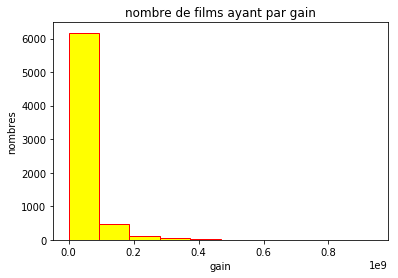

In [166]:
"""ici on visualise les gains des films"""

gain=kaggle_movies["gross"].values
plt.hist(gain,color = 'yellow',edgecolor = 'red')
plt.xlabel('gain')
plt.ylabel('nombres')
plt.title('nombre de films ayant par gain') 

In [159]:
"""La plus part des films rapportent entre 0 et 100 millions de dollars"""

'La plus part des films rapportent entre 0 et 100 millions de dollars'

Text(0.5, 1.0, 'nombre de films par précise')

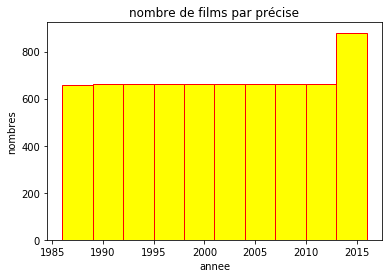

In [167]:
"""ici on visualise le nombre de films par année"""

year=kaggle_movies["year"].values
plt.hist(year,color = 'yellow',edgecolor = 'red')
plt.xlabel('annee')
plt.ylabel('nombres')
plt.title('nombre de films par précise') 

In [173]:
"""chaque année on a à peu près legenres=np.unique(kaggle_movies["genre"].values)
print(genres) même nombre de films produit , avec une hausse de la production
entre 2013 et 2015"""

'cahque année on a à peu près le même nombre de films produit , avec une hausse de la production\nentre 2013 et 2015'

In [210]:
genres=np.unique(kaggle_movies["genre"].values)
print(genres)

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Horror' 'Musical' 'Mystery' 'Romance' 'Sci-Fi'
 'Thriller' 'War' 'Western']


In [241]:
"""On va essayer dobtenir des infos à partir des genres des films.
Pour cela on créer plusieurs dataset pour contenir les différents genre.
Car il  y a trop de films et les infos deviennent vite illisibles."""

#contient tous les films dont le genre fait partit de ['Action' 'Adventure' 'Animation' 'Biography']
masque=kaggle_movies["genre"].isin(['Action','Adventure','Animation','Biography','War','Western'])
D1=kaggle_movies[masque].values

#contient tous les films dont le genre fait partit de ['Comedy' 'Crime' 'Drama''Family' 'Fantasy' ]
masque=kaggle_movies["genre"].isin(['Comedy','Crime','Drama','Family','Fantasy' ])
D2=kaggle_movies[masque].values


#contient tous les films dont le genre fait partit de ['Horror' 'Musical' 'Mystery' 'Romance']
masque=kaggle_movies["genre"].isin(['Horror','Musical','Mystery','Romance','Sci-Fi','Thriller',  ])
D3=kaggle_movies[masque].values




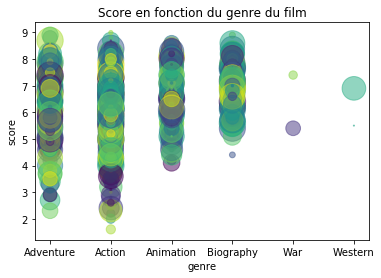

In [242]:
""" ici je visualise le score  d'un film en fonction du genre ,
sur tous les films entre 1986 et 2016
"""
masque=kaggle_movies["genre"].isin(['Action','Adventure','Animation','Biography','War','Western'])
score=kaggle_movies["score"][masque].values
genre=kaggle_movies["genre"][masque].values

colors=np.random.rand(len(genre))
area= np.pi * (15 * np.random.rand(len(genre)))**2
#En abcisse on veut les scores , et en ordonnée le nombre de votespar films
plt.scatter(genre,score,s=area, c=colors, alpha=0.5)

plt.title('Score en fonction du genre du film')
plt.xlabel('genre')
plt.ylabel('score')
plt.show()

In [243]:
"""Les gens apprécient + les films de genre Action ou d'animation"""

"Les gens apprécient + les films de genre Action ou d'animation"

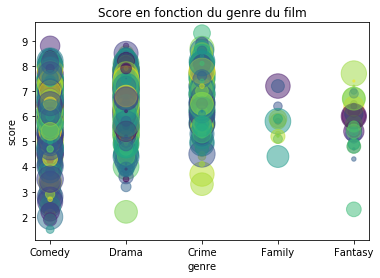

In [244]:
""" ici je visualise le score  d'un film en fonction du genre ,
sur tous les films entre 1986 et 2016
"""
masque=kaggle_movies["genre"].isin(['Comedy','Crime','Drama','Family','Fantasy' ])
score=kaggle_movies["score"][masque].values
genre=kaggle_movies["genre"][masque].values

colors=np.random.rand(len(genre))
area= np.pi * (15 * np.random.rand(len(genre)))**2
#En abcisse on veut les scores , et en ordonnée le nombre de votespar films
plt.scatter(genre,score,s=area, c=colors, alpha=0.5)

plt.title('Score en fonction du genre du film')
plt.xlabel('genre')
plt.ylabel('score')
plt.show()

In [245]:
"""Les gens apprécient les films du genres comedy,drame ou crime
"""

'Les gens apprécient les films du genres comedy,drame ou crime\n'

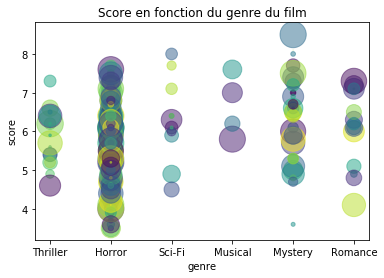

In [246]:
""" ici je visualise le score  d'un film en fonction du genre ,
sur tous les films entre 1986 et 2016
"""
masque=kaggle_movies["genre"].isin(['Horror','Musical','Mystery','Romance','Sci-Fi','Thriller', ])
score=kaggle_movies["score"][masque].values
genre=kaggle_movies["genre"][masque].values

colors=np.random.rand(len(genre))
area= np.pi * (15 * np.random.rand(len(genre)))**2
#En abcisse on veut les scores , et en ordonnée le nombre de votespar films
plt.scatter(genre,score,s=area, c=colors, alpha=0.5)

plt.title('Score en fonction du genre du film')
plt.xlabel('genre')
plt.ylabel('score')
plt.show()

In [247]:
"""Les gens apprécient plus les film du genre Mystère ou horreur
"""

'Les gens apprécient plus les film du genre Mystère ou horreur\n'

[Text(0, 0, 'Horror'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Thriller')]

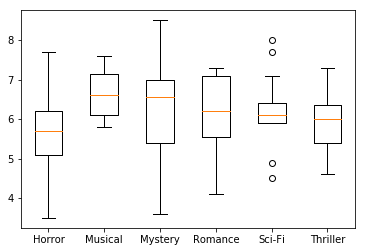

In [303]:
"""On regarde ici le score moyenne obtenu pour chaque genre de film"""
masque=kaggle_movies["genre"]=='Horror'
masque2=kaggle_movies["genre"]=='Musical'
masque3=kaggle_movies["genre"]=='Mystery'
masque4=kaggle_movies["genre"]=='Romance'
masque5=kaggle_movies["genre"]=='Sci-Fi'
masque6=kaggle_movies["genre"]=='Thriller'

score=kaggle_movies["score"][masque].values
score2=kaggle_movies["score"][masque2].values
score3=kaggle_movies["score"][masque3].values
score4=kaggle_movies["score"][masque4].values
score5=kaggle_movies["score"][masque5].values
score6=kaggle_movies["score"][masque6].values
#convertir les npdarray en liste
score=score.tolist()
score2=score2.tolist()
score3=score3.tolist()
score4=score4.tolist()
score5=score5.tolist()
score6=score6.tolist()
plt.boxplot([score,score2,score3,score4,score5,score6])
plt.gca().xaxis.set_ticklabels(['Horror', 'Musical', 'Mystery','Romance','Sci-Fi','Thriller'])

In [306]:
"""On observe que En moyenne les gens apprécient + les films du genre Mystere et Musical"""

'On observe que En moyenne les gens apprécient + les films du genre Mystere et Musical'

[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Western')]

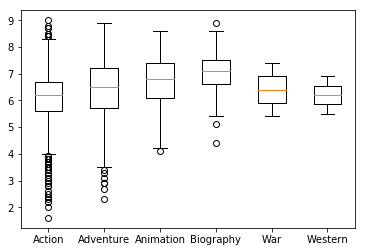

In [307]:
"""On regarde ici le score moyenne obtenu pour chaque genre de film"""

masque=kaggle_movies["genre"]=='Action'
masque2=kaggle_movies["genre"]=='Adventure'
masque3=kaggle_movies["genre"]=='Animation'
masque4=kaggle_movies["genre"]=='Biography'
masque5=kaggle_movies["genre"]=='War'
masque6=kaggle_movies["genre"]=='Western'

score=kaggle_movies["score"][masque].values
score2=kaggle_movies["score"][masque2].values
score3=kaggle_movies["score"][masque3].values
score4=kaggle_movies["score"][masque4].values
score5=kaggle_movies["score"][masque5].values
score6=kaggle_movies["score"][masque6].values
#convertir les npdarray en liste
score=score.tolist()
score2=score2.tolist()
score3=score3.tolist()
score4=score4.tolist()
score5=score5.tolist()
score6=score6.tolist()
plt.boxplot([score,score2,score3,score4,score5,score6])
plt.gca().xaxis.set_ticklabels(['Action','Adventure','Animation','Biography','War','Western'])

In [309]:
"""On observe que En moyenne les gens apprécient + les films du genre Biography et animation"""

'On observe que En moyenne les gens apprécient + les films du genre Biography et animation'

[Text(0, 0, 'Comedy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Fantasy')]

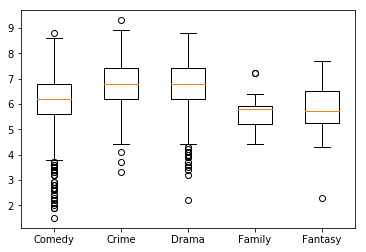

In [310]:
"""On regarde ici le score moyenne obtenu pour chaque genre de film"""

masque=kaggle_movies["genre"]=='Comedy'
masque2=kaggle_movies["genre"]=='Crime'
masque3=kaggle_movies["genre"]=='Drama'
masque4=kaggle_movies["genre"]=='Family'
masque5=kaggle_movies["genre"]=='Fantasy'


score=kaggle_movies["score"][masque].values
score2=kaggle_movies["score"][masque2].values
score3=kaggle_movies["score"][masque3].values
score4=kaggle_movies["score"][masque4].values
score5=kaggle_movies["score"][masque5].values

#convertir les npdarray en liste
score=score.tolist()
score2=score2.tolist()
score3=score3.tolist()
score4=score4.tolist()
score5=score5.tolist()

plt.boxplot([score,score2,score3,score4,score5])
plt.gca().xaxis.set_ticklabels(['Comedy','Crime','Drama','Family','Fantasy' ])

In [311]:
"""On observe que En moyenne les gens apprécient + les films du genre Drama et Crime"""

'On observe que En moyenne les gens apprécient + les films du genre Drama et Crime'

[Text(0, 0, 'Horror'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Thriller')]

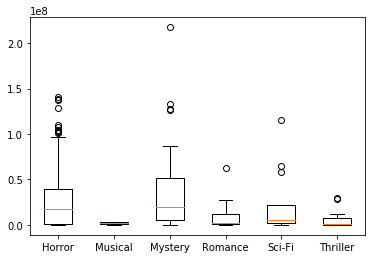

In [315]:
"""On regarde ici le gain moyen obtenu pour chaque genre de film"""

masque=kaggle_movies["genre"]=='Horror'
masque2=kaggle_movies["genre"]=='Musical'
masque3=kaggle_movies["genre"]=='Mystery'
masque4=kaggle_movies["genre"]=='Romance'
masque5=kaggle_movies["genre"]=='Sci-Fi'
masque6=kaggle_movies["genre"]=='Thriller'


gain=kaggle_movies["gross"][masque].values
gain2=kaggle_movies["gross"][masque2].values
gain3=kaggle_movies["gross"][masque3].values
gain4=kaggle_movies["gross"][masque4].values
gain5=kaggle_movies["gross"][masque5].values
gain6=kaggle_movies["gross"][masque6].values
#convertir les npdarray en liste
gain=gain.tolist()
gain2=gain2.tolist()
gain3=gain3.tolist()
gain4=gain4.tolist()
gain5=gain5.tolist()
gain6=gain6.tolist()

plt.boxplot([gain,gain2,gain3,gain4,gain5,gain6])
plt.gca().xaxis.set_ticklabels(['Horror', 'Musical', 'Mystery','Romance','Sci-Fi','Thriller'])

In [ ]:
"""En moyenne ce sont les films du genre Mystere qui font le + gros gain"""

[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Western')]

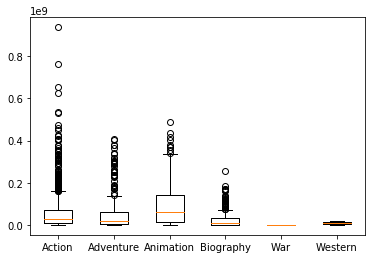

In [317]:
"""On regarde ici le gain moyen obtenu pour chaque genre de film"""


masque=kaggle_movies["genre"]=='Action'
masque2=kaggle_movies["genre"]=='Adventure'
masque3=kaggle_movies["genre"]=='Animation'
masque4=kaggle_movies["genre"]=='Biography'
masque5=kaggle_movies["genre"]=='War'
masque6=kaggle_movies["genre"]=='Western'


gain=kaggle_movies["gross"][masque].values
gain2=kaggle_movies["gross"][masque2].values
gain3=kaggle_movies["gross"][masque3].values
gain4=kaggle_movies["gross"][masque4].values
gain5=kaggle_movies["gross"][masque5].values
gain6=kaggle_movies["gross"][masque6].values
#convertir les npdarray en liste
gain=gain.tolist()
gain2=gain2.tolist()
gain3=gain3.tolist()
gain4=gain4.tolist()
gain5=gain5.tolist()
gain6=gain6.tolist()

plt.boxplot([gain,gain2,gain3,gain4,gain5,gain6])
plt.gca().xaxis.set_ticklabels(['Action','Adventure','Animation','Biography','War','Western'])

"""En moyenne ce sont les films du genre Mystere qui font le + gros gain"""

[Text(0, 0, 'Comedy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Fantasy')]

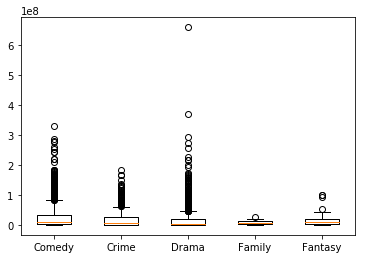

In [318]:
"""On regarde ici le gain moyen obtenu pour chaque genre de film"""

masque=kaggle_movies["genre"]=='Comedy'
masque2=kaggle_movies["genre"]=='Crime'
masque3=kaggle_movies["genre"]=='Drama'
masque4=kaggle_movies["genre"]=='Family'
masque5=kaggle_movies["genre"]=='Fantasy'



gain=kaggle_movies["gross"][masque].values
gain2=kaggle_movies["gross"][masque2].values
gain3=kaggle_movies["gross"][masque3].values
gain4=kaggle_movies["gross"][masque4].values
gain5=kaggle_movies["gross"][masque5].values

#convertir les npdarray en liste
gain=gain.tolist()
gain2=gain2.tolist()
gain3=gain3.tolist()
gain4=gain4.tolist()
gain5=gain5.tolist()


plt.boxplot([gain,gain2,gain3,gain4,gain5])
plt.gca().xaxis.set_ticklabels(['Comedy','Crime','Drama','Family','Fantasy' ])

In [320]:
"""En moyenne ce sont les films du genre Comedy qui font le + gros gain"""

'En moyenne ce sont les films du genre Comedy qui font le + gros gain'